# Spotify 2024 Data Analysis

This dataset was taken from Kaggle and describes the most streamed Spotify songs from 2024. The dataset and relevant documentation can be found at the following link: (https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024) and updated as of 7/1/2024.

In [130]:
import pandas as pd
import numpy
import os
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file_path = "C:/Users/AVILA/Desktop"

In [131]:
df = pd.read_csv(file_path + "/Most Streamed Spotify Songs 2024.csv", encoding_errors = "replace")

In [132]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


# Data Pre-Analysis + Cleaning

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

Identified that some of the notationa was not standard throughout the dataset, so standardized using the following lines of code.

In [136]:
df.loc[:, "All Time Rank" : "Explicit Track"] = df.iloc[:, 5:30].replace(",", "", regex = True)

In [137]:
df.loc[:, "All Time Rank" : "Explicit Track"].head()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,1,725.4,390470936,30716,196631588,92.0,84274754,1713126,5767700,651565900,...,684,62.0,17598718,114.0,18004655,22931,4818457,2669262,NaN,0
1,2,545.9,323703884,28113,174597137,92.0,116347040,3486739,674700,35223547,...,3,67.0,10422430,111.0,7780028,28444,6623075,1118279,NaN,1
2,3,538.4,601309283,54331,211607669,92.0,122599116,2228730,3025400,275154237,...,536,136.0,36321847,172.0,5022621,5639,7208651,5285340,NaN,0
3,4,444.9,2031280633,269802,136569078,85.0,1096100899,10629796,7189811,1078757968,...,2182,264.0,24684248,210.0,190260277,203384,NaN,11822942,NaN,0
4,5,423.3,107034922,7223,151469874,88.0,77373957,3670188,16400,NaN,...,1,82.0,17660624,105.0,4493884,7006,207179,457017,NaN,1


# Analysis Plan
After loading the dataset into JupyterLabs, the primary questions that I want to analyze this dataset for are...
1. Are there any major discrepancies in terms of the number of average plays per day of a song and when the song is released?
2. Are songs popular across all platforms evenly? Are there songs that have a high play rate on some platforms over other platforms?
3. On average, are explicit songs more popular than clean songs?


# 1. Determining major discrepancies in terms of the number of average plays per day of a song and when the song is released

In [140]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

I identified the columns that would indicate the total number of listens that any individual song would have across all platforms.

In [142]:
columns = pd.DataFrame([df["Spotify Streams"],
                        df["YouTube Views"], 
                        df["TikTok Views"], 
                        df["AirPlay Spins"], 
                        df["SiriusXM Spins"], 
                        df["Pandora Streams"],
                        df["Soundcloud Streams"],
                        df["Shazam Counts"]])

After creating a seperate dataframe that contained those columns, I replaced the NaN values with 0.

In [144]:
columns = columns.fillna(0)

And since some of the variable types were stored as strings, I reformated all values to numeric values (which defaulted to floats)

In [146]:
for column in columns.columns:
    columns.iloc[:, column] = pd.to_numeric(columns.iloc[:, column])   

total_streams was created using a list comprehension to capture the sum of listens across each platform for each song, standardized to int64 values (as the numbers were too large for standard python), and then assigned back to the original dataframe.

In [148]:
total_streams = pd.Series([columns[column].sum() for column in columns.columns])
df["Total Streams"] = total_streams.astype("int64")

Now working with the date-time column "Release Date"

In [150]:
df["Release Date"] = pd.to_datetime(df["Release Date"])

In [151]:
df["data release date"] = pd.to_datetime("2024/07/01", format = "%Y/%m/%d")

In [152]:
df["dif days"] = df["data release date"] - df["Release Date"]
df["dif days"] = df["dif days"].dt.days

In [153]:
df["avg listens per day"] = (df["Total Streams"] / df["dif days"]).round(2)

In [154]:
first_quartile = df[df["Track Score"] < 23.3]
second_quartile = df[(df["Track Score"] > 23.3) & (df["Track Score"] < 29.9)]
third_quartile = df[(df["Track Score"] > 29.9) & (df["Track Score"] < 44.425)]
fourth_quartile = df[df["Track Score"] > 44.425]

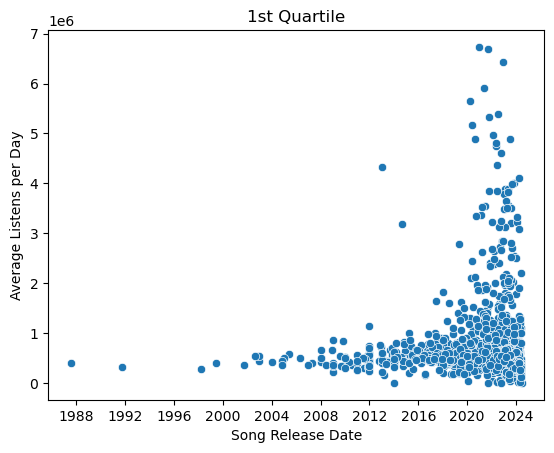

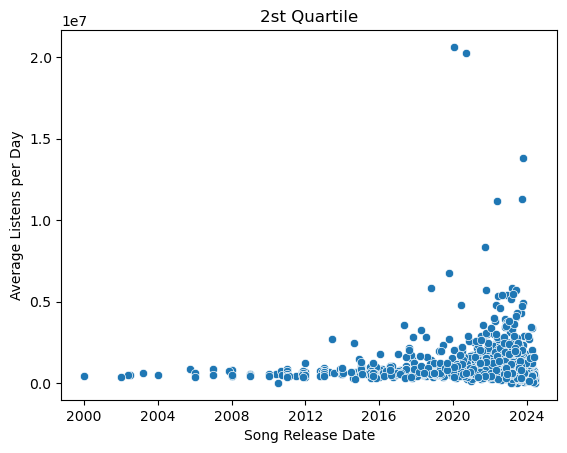

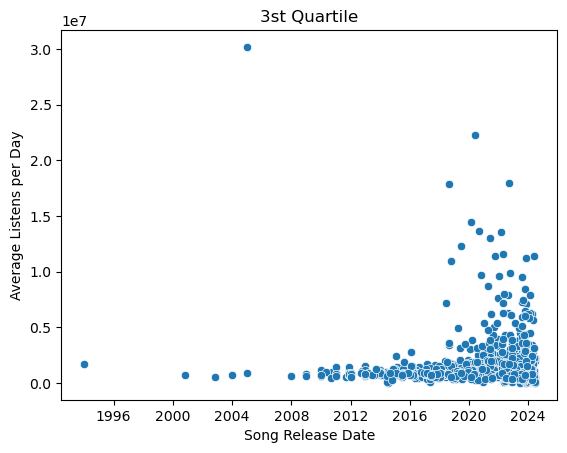

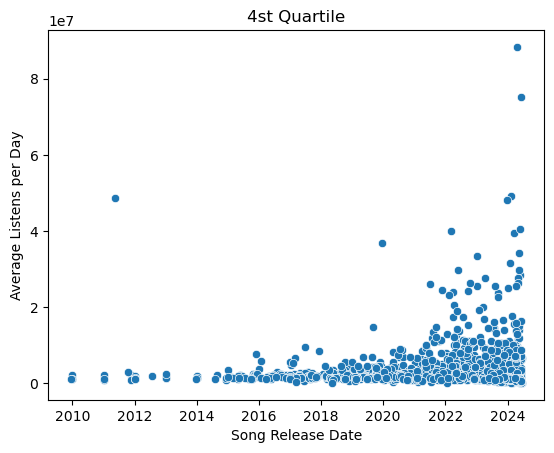

In [155]:
quartiles = [first_quartile, second_quartile, third_quartile, fourth_quartile]
i = 0
for quartile in quartiles:
    i+=1
    sns.scatterplot(x = "Release Date", y = "avg listens per day", data = quartile)
    plt.xlabel("Song Release Date")
    plt.ylabel("Average Listens per Day")
    plt.title(str(i) + "st Quartile")

    plt.show()

While the above seaborn plots are helpful visuals, if we wanted to understand the relationship of release date and average listens per day, we would be interested in running a linear regression to determine the correlation coefficient. Therefore we run a linear regression below, controlling for genre and streaming platform.

In [157]:
#what if I ran a regression of the popularity of a song against when it was released and the number of listens per day?
# what is the relationship between the popularity of a song and when it was released?
# what is the relationship between the popularity of a song and its genre?
# is popularity the number of listens or is it the track score?


In [158]:
y = df["avg listens per day"]
x = pd.DataFrame(df["dif days"])

ols = LinearRegression()
ols_results = ols.fit(x, y)
print(ols_results.intercept_.round(1),ols_results.coef_.round(1))

2231354.3 [-299.1]


In [159]:
y = (df["Total Streams"])

ols_results2 = ols.fit(x, y)
print(ols_results2.intercept_.round(1), ols_results2.coef_.round(1))

590270341.5 [965001.3]


So what we are finding is that as a song is released, there is an initial surge in the number of listens. However, for each day that the song gets further from the day it was released, it looses on average 300 listens. However, for every extra day further from the release date of the song, the song racks up on average an extra 965000 listens across all platforms. Essentially what this is saying is that the total number of streams increases per each day after a song has been released, but the change in the average number of streams per day is happening at a decreasing rate. This makes sense since songs cant lose listens, but they can lose popularity over time.

# 2. Determining popularity across platforms

In [162]:
columns = columns.transpose()

In [163]:
for column in columns:
    colname = column + " percentage"
    df[colname] = pd.Series(df[column]).fillna(0).astype("int64")
    df[colname] = (df[colname] / df["Total Streams"]) * 100

In [164]:
df["Track Score"].head()

0    725.4
1    545.9
2    538.4
3    444.9
4    423.3
Name: Track Score, dtype: float64

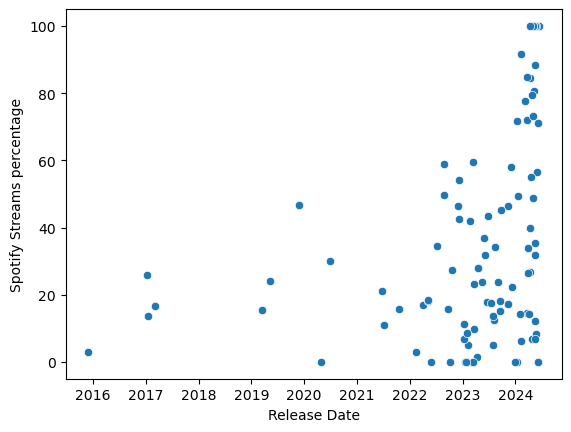

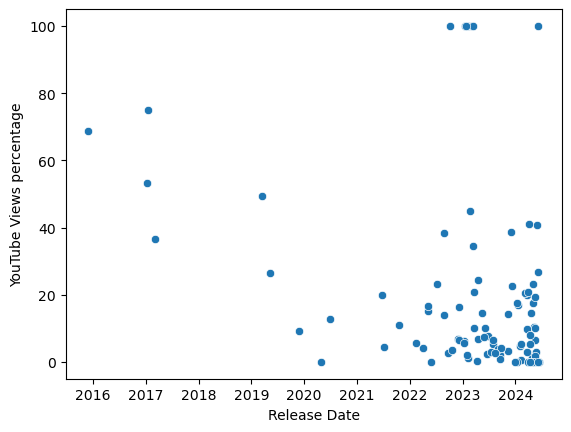

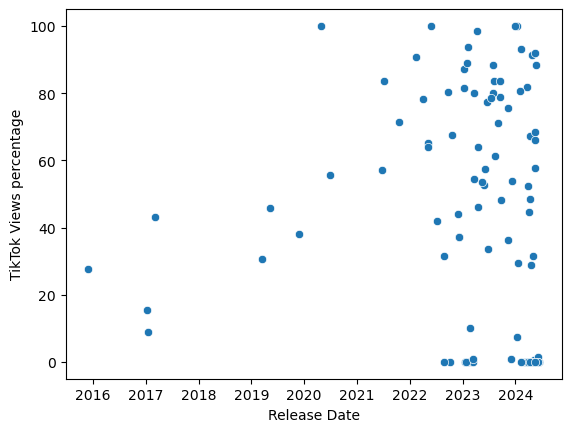

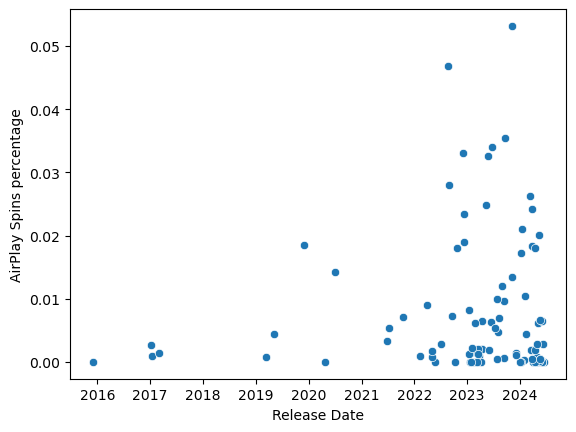

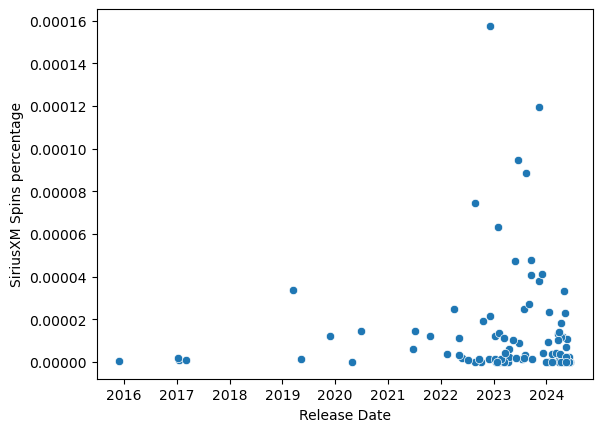

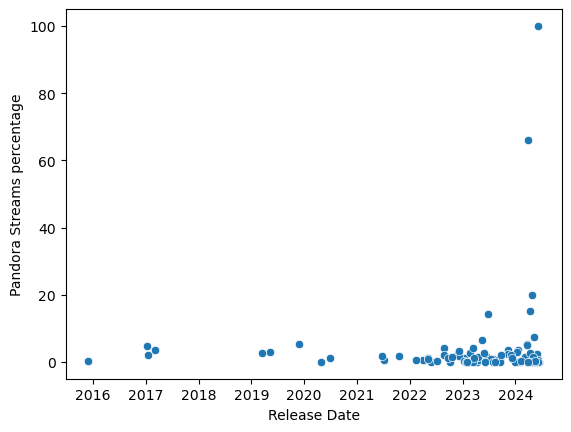

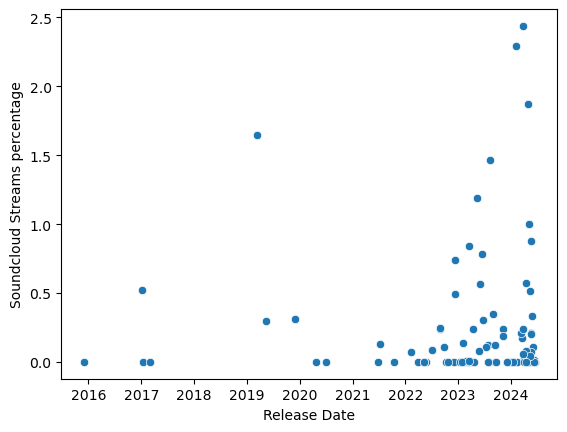

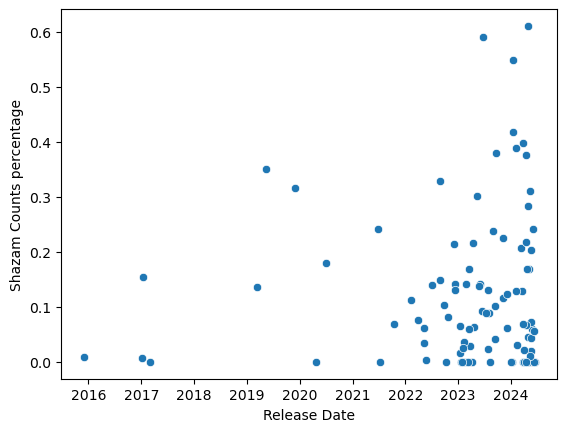

In [165]:
visuals = df.loc[:, "Spotify Streams percentage": "Shazam Counts percentage"]

for colname in visuals:
    sns.scatterplot(x = "Release Date", y = colname, data = df[0:100])
    plt.show()

The visuals above indicate that Spotify and Youtube are by far the two primary methods that individuals are interacting with music in this dataset. In particular, songs that are new have a high number of listens coming from these two platforms. Youtube, on the other hand, has songs that are relatively older, that are still generating a significant number of their listens on the platform. One mechanism to note is that a platform like Youtube is older, and therefore older songs will have more opportunity to be listened to on Youtube relative to a new platform such as TikTok, which was only created relatively recently. So new songs have a higher chance of being listened to on new platforms, while older songs are typically listened to on older platforms.

# 3. On average, are explicit songs more popular than clean songs?

In [167]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track', 'Total Streams', 'data release date', 'dif days',
       'avg listens per day', 'Spotify Streams percentage',
       'YouTube Views percentage', 'TikTok Views percentage',
       'AirPlay Spins percentage', 'SiriusXM Spins percentage',
       'Pandora Streams percentage', 'Soundcloud Streams percentage',
       'Shazam Counts percentage'],
      dtype='object')

In [168]:
clean_songs = df[df["Explicit Track"] == 0]
explicit_songs = df[df["Explicit Track"] == 1]

In [169]:
clean_songs["Track Score"].describe().round(1)

count    2949.0
mean       40.6
std        36.3
min        19.4
25%        23.2
50%        29.7
75%        43.3
max       725.4
Name: Track Score, dtype: float64

In [170]:
explicit_songs["Track Score"].describe().round(1)

count    1651.0
mean       44.0
std        42.1
min        19.4
25%        23.5
50%        30.4
75%        46.4
max       545.9
Name: Track Score, dtype: float64

In [171]:
clean_songs["avg listens per day"].describe().round(1)

count        2949.0
mean      1779488.2
std       3481740.2
min             0.0
25%        572509.4
50%        889054.0
75%       1678841.6
max      88372146.4
Name: avg listens per day, dtype: float64

In [172]:
explicit_songs["avg listens per day"].describe().round(1)

count        1651.0
mean      1996230.6
std       4027115.8
min             0.0
25%        495398.6
50%        855027.4
75%       1807158.6
max      75137187.2
Name: avg listens per day, dtype: float64

In [173]:
y = df["avg listens per day"]
x = pd.DataFrame(df["Explicit Track"])

ols = LinearRegression()
ols_results = ols.fit(x, y)
print(ols_results.intercept_.round(1),ols_results.coef_.round(1))

1779488.2 [216742.4]


In [174]:
y = df["Track Score"]
x = pd.DataFrame(df["Explicit Track"])

ols = LinearRegression()
ols_results = ols.fit(x, y)
print(ols_results.intercept_.round(1),ols_results.coef_.round(1))

40.6 [3.4]


It seems that explicit songs are more highly rated AND receive more average daily listens, therefore implying that these songs are in fact more popular than clean songs. In lines 169 - 172, we see can see this through both means of "avg listens per day" and "Track Score" being higher in explicit songs versus clean songs. Alternatively, in lines 173 and 174, we can see that the OLS coefficient output matches the difference in means generated in lines 169 - 172. 